<a href="https://colab.research.google.com/github/janaat22/MLdatasets/blob/master/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [249]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from sklearn import preprocessing
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
import nltk  
nltk.download('punkt')
from sklearn.metrics import accuracy_score 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [250]:
df = pd.read_csv("ReviewCSV_final.csv")

print("Number of rows: ", df.shape[0])
counts = df.describe().iloc[0]
display(
pd.DataFrame(
counts.tolist(), 
columns=["Count of values"], 
index=counts.index.values
).transpose()
)
df['label'] = df.label.map({'Y': 1, 'N': 0}) 
df['review'] = df.review.map(lambda x: x.lower()) 
df['review'] = df.review.str.replace('[^\w\s]', '')

#Preprocess Data
df['review'] = df['review'].apply(nltk.word_tokenize)

Number of rows:  61485


,month,date,year,fakecount,truecount,rating1,rating2,rating3,rating4
Count of values,61485.0,61485.0,61485.0,61485.0,61485.0,61485.0,61485.0,61485.0,61485.0


In [0]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

df['review'] = df['review'].apply(lambda x: [stemmer.stem(y) for y in x]) 

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

# This converts the list of words into space-separated strings
df['review'] = df['review'].apply(lambda x: ' '.join(x))



In [0]:
features = df.drop(["label"], axis=1).columns

le = preprocessing.LabelEncoder()
for column_name in df.columns:
        if df[column_name].dtype == object:
            df[column_name] = le.fit_transform(df[column_name])
        else:
            pass

df_train, df_test = train_test_split(df, test_size=0.25)


In [254]:
df_train = df_train.fillna(method='ffill')

#train classifier

clf = BernoulliNB()

clf.fit(df_train[features], df_train["label"])


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [255]:
#make predictions

predictions = clf.predict(df_test[features])
probs = clf.predict_proba(df_test[features])
display(predictions)

array([0, 1, 0, ..., 0, 0, 0])

In [256]:
#Evaluation

score = clf.score(df_test[features], df_test["label"])
print("Accuracy: "+ str(score))

Accuracy: 0.9979182930002602


In [257]:
#Confusion Matrix
results = confusion_matrix(df_test["label"], predictions) 

get_ipython().magic('matplotlib inline')
confusion_matrix = pd.DataFrame(
    confusion_matrix(df_test["label"], predictions), 
    columns=["Predicted Genuine", "Predicted Fake"], 
    index=["Genuine reviews", "Fake reviews"]
)
display(confusion_matrix) 

,Predicted Genuine,Predicted Fake
Genuine reviews,13332,32
Fake reviews,0,2008


In [258]:
display(results)

array([[13332,    32],
       [    0,  2008]])

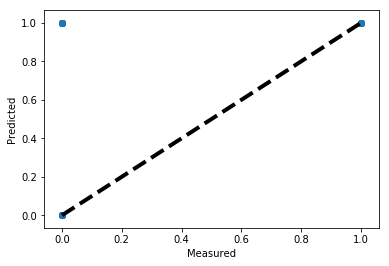

In [259]:
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()
#boston = datasets.load_boston()
y = df_test["label"]

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validated:
#predicted = cross_val_predict(lr, boston.data, y, cv=10)

fig,ax = plt.subplots()
ax.scatter(y, predictions)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

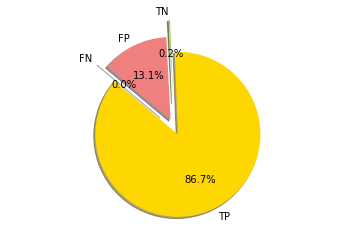

In [260]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'TP', 'TN', 'FP', 'FN'
sizes = [results[0][0],results[0][1],results[1][1],results[1][0]]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0.3, 0.1, 0.2)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()